# Does the linear regression make sense?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## RegNetWeb

In [142]:
# import datasets
regnet_regulators = pd.read_csv('regnetworkweb_all8tf.csv')
regnet_targets = pd.read_csv('regnet_targets.csv')
regnet_all = pd.concat([regnet_regulators, regnet_targets], axis=0)

# greater than 100
smaller = pd.read_pickle('test_data.pkl')

# greater than 50
#data = pd.read_pickle('larger_data.pkl')
data = pd.read_pickle('p_values.pkl')



In [143]:
regnet_all

,regulator_symbol,regulator_id,target_symbol,target_id,database,evidence,confidence
0,HIF1A,3091,VHL,7428,"hprd,kegg",Experimental,High
1,HIF1A,3091,TGFB3,7043,"tred,kegg",Experimental,High
2,HIF1A,3091,SLC2A1,6513,"tred,kegg",Experimental,High
3,HIF1A,3091,FIGF,2277,"tred,kegg",Experimental,High
4,HIF1A,3091,VHL,7428,tred,Experimental,High
...,...,...,...,...,...,...,...
27,ETS1,2113,CDK4,1019,kegg,Experimental,High
28,CSDA,8531,CDK4,1019,kegg,Experimental,High
29,RB1,5925,CDK4,1019,"hprd,kegg",Experimental,High
30,RBL1,5933,CDK4,1019,"hprd,kegg",Experimental,High


In [144]:
# capitalize first letter
regnet_all['regulator_symbol'] = [x.capitalize() for x in regnet_all['regulator_symbol']]
regnet_all['target_symbol'] = [x.capitalize() for x in regnet_all['target_symbol']]

In [145]:
data

,predictors,coefficients,target,p_values
42,Mcm3,0.024322,1110004E09Rik,0.037800
61,Mcm6,0.190814,1110004E09Rik,0.035029
81,Cdk4,-0.029327,1500009L16Rik,0.047847
159,Tox,0.059393,1500009L16Rik,0.046285
202,Mcm3,0.077020,1600014C10Rik,0.020605
...,...,...,...,...
88590,Klf2,0.006186,Zranb3,0.015451
88601,Mcm3,0.465177,Zranb3,0.018412
88618,Mcm5,0.149638,Zranb3,0.019094
88660,Hmgb2,-0.088547,Zwilch,0.023983


In [147]:
# to work with data
data = data.reset_index()

In [159]:
# Curate Data for the percentiles...
linearCoefs8 = pd.read_pickle('linearCoefs8.pkl')
linearScores8 = pd.read_pickle('linearScores8.pkl')

mean_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
std_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

msl = pd.DataFrame()
msl['mean'] = linearCoefs8.groupby(['predictors', 'target']).coefficients.mean()
msl['sd'] = linearCoefs8.groupby(['predictors', 'target']).coefficients.std()
msl['mean/sd'] = msl['mean']/msl['sd']


In [180]:
msl = msl.reset_index(col_fill =['predictors', 'target', 'mean', 'sd', 'mean/sd'])


In [181]:
msl

,predictors,target,mean,sd,mean/sd
0,Cdk4,1110004E09Rik,-0.156868,0.007278,-21.554673
1,Cdk4,1500009L16Rik,-0.043698,0.007656,-5.707916
2,Cdk4,1600014C10Rik,0.065108,0.006708,9.705507
3,Cdk4,1700017B05Rik,-0.192072,0.005155,-37.261133
4,Cdk4,1700019D03Rik,-0.019391,0.007689,-2.521931
...,...,...,...,...,...
8867,Tox,Zeb2,0.011206,0.007584,1.477595
8868,Tox,Zfp36l1,-0.013702,0.007655,-1.789928
8869,Tox,Zfp831,0.195498,0.007195,27.172273
8870,Tox,Zranb3,-0.126703,0.002787,-45.469235


In [190]:
# Maximum, using all the data:
data = msl

summary = {}
predictors = data['predictors'].drop_duplicates().tolist()


for x in predictors:
    t = regnet_all[regnet_all['regulator_symbol']==x]['target_symbol'].tolist()
    d = data[data['predictors']==x]['target'].tolist()
    #print(x)
    #print('This is regnet_all', t)
    #print('This is model', d)
    s = list(set(t) & set(d))
    summary[x]={'total': len(t), 'matchP': s}

for x in predictors:
    t = regnet_all[regnet_all['target_symbol']==x]['regulator_symbol'].tolist()
    d = data[data['predictors']==x]['target'].tolist()
    #print(x)
    #print('This is regnet_all', t)
    #print('This is model', d)
    s = list(set(t) & set(d))
    summary[x]['total']+= len(t)
    summary[x]['matchT']= s

In [191]:
summary

{'Cdk4': {'total': 11,
  'matchP': [],
  'matchT': ['Rbl1', 'Ets1', 'Rbl2', 'Myc']},
 'Hif1a': {'total': 118,
  'matchP': ['Fam162a',
   'Id2',
   'Hk2',
   'Bhlhe40',
   'Pdgfb',
   'Cdkn1a',
   'Nt5e',
   'Tfrc'],
  'matchT': ['Myc']},
 'Hmgb2': {'total': 1, 'matchP': [], 'matchT': ['Myb']},
 'Klf2': {'total': 3, 'matchP': [], 'matchT': []},
 'Mcm3': {'total': 14,
  'matchP': ['Dbf4', 'Orc1', 'Orc6', 'Cdc45'],
  'matchT': ['Myc', 'E2f1', 'Myb']},
 'Mcm5': {'total': 13,
  'matchP': ['Dbf4', 'Orc1', 'Orc6', 'Cdc45'],
  'matchT': ['Myc', 'E2f1']},
 'Mcm6': {'total': 11,
  'matchP': ['Dbf4', 'Orc1', 'Orc6', 'Cdc45'],
  'matchT': []},
 'Tox': {'total': 0, 'matchP': [], 'matchT': []}}

In [271]:
data = pd.DataFrame()


summary = {}
#percentages = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
percentages = list(np.arange(0.01, 0.5, 0.01))


for i in percentages:
    n = int(len(msl)*i)
    print('This is the number of values used: ', n)
    smallest = msl.nsmallest(columns='mean/sd', n=n)
    largest = msl.nlargest(columns='mean/sd', n=n)
    data = pd.concat([smallest, largest], axis=0)
    # Comparing Data from RegNetWeb

    predictors = data['predictors'].drop_duplicates().tolist()

    for x in predictors:
        t = regnet_all[regnet_all['regulator_symbol']==x]['target_symbol'].tolist()
        d = data[data['predictors']==x]['target'].tolist()
        #print(x)
        #print('This is regnet_all', t)
        #print('This is model', d)
        s = list(set(t) & set(d))
        summary.setdefault(str(i), {})[x]={'total': len(t), 'matchP': s}

    for x in predictors:
        t = regnet_all[regnet_all['target_symbol']==x]['regulator_symbol'].tolist()
        d = data[data['predictors']==x]['target'].tolist()
        #print(x)
        #print('This is regnet_all', t)
        #print('This is model', d)
        s = list(set(t) & set(d))
        summary[str(i)][x]['total']+= len(t)
        summary[str(i)][x]['matchT']= s

This is the number of values used:  88
This is the number of values used:  177
This is the number of values used:  266
This is the number of values used:  354
This is the number of values used:  443
This is the number of values used:  532
This is the number of values used:  621
This is the number of values used:  709
This is the number of values used:  798
This is the number of values used:  887
This is the number of values used:  975
This is the number of values used:  1064
This is the number of values used:  1153
This is the number of values used:  1242
This is the number of values used:  1330
This is the number of values used:  1419
This is the number of values used:  1508
This is the number of values used:  1596
This is the number of values used:  1685
This is the number of values used:  1774
This is the number of values used:  1863
This is the number of values used:  1951
This is the number of values used:  2040
This is the number of values used:  2129
This is the number of values

In [251]:
summary


{'0.01': {'Klf2': {'total': 3, 'matchP': [], 'matchT': []},
  'Mcm6': {'total': 11, 'matchP': [], 'matchT': []},
  'Hmgb2': {'total': 1, 'matchP': [], 'matchT': []},
  'Hif1a': {'total': 118, 'matchP': [], 'matchT': []},
  'Tox': {'total': 0, 'matchP': [], 'matchT': []},
  'Mcm5': {'total': 13, 'matchP': [], 'matchT': []},
  'Cdk4': {'total': 11, 'matchP': [], 'matchT': []},
  'Mcm3': {'total': 14, 'matchP': [], 'matchT': []}},
 '0.05': {'Klf2': {'total': 3, 'matchP': [], 'matchT': []},
  'Mcm6': {'total': 11, 'matchP': [], 'matchT': []},
  'Hmgb2': {'total': 1, 'matchP': [], 'matchT': []},
  'Hif1a': {'total': 118, 'matchP': ['Pdgfb'], 'matchT': []},
  'Tox': {'total': 0, 'matchP': [], 'matchT': []},
  'Mcm5': {'total': 13, 'matchP': [], 'matchT': []},
  'Cdk4': {'total': 11, 'matchP': [], 'matchT': []},
  'Mcm3': {'total': 14, 'matchP': [], 'matchT': []}},
 '0.1': {'Klf2': {'total': 3, 'matchP': [], 'matchT': []},
  'Mcm6': {'total': 11, 'matchP': [], 'matchT': []},
  'Hmgb2': {'tota

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

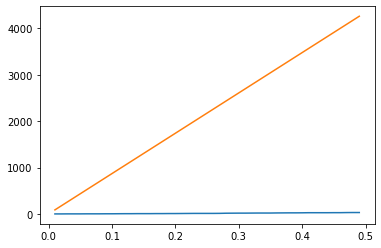

In [272]:
# Plot all precentages:
count = []
for p,i in zip(percentages, list(range(0, len(percentages)))):
               count+=[sum([len(l['matchP'])+len(l['matchT']) for l in summary[str(p)].values()])]
               
sns.lineplot(percentages, count)
sns.lineplot(percentages, np.array([len(data)]*len(percentages))*np.array(percentages))

Well, this does not look very good. The dimensions are just too great, and the matches too few. Looking only at the increase in matches, it does look promising.

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

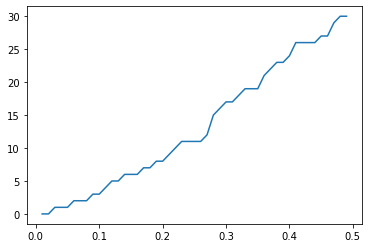

In [273]:
sns.lineplot(percentages, count)

In [156]:
# Comparing Data from RegNetWeb

predictors = data['predictors'].drop_duplicates().tolist()

summary = {}

for x in predictors:
    t = regnet_all[regnet_all['regulator_symbol']==x]['target_symbol'].tolist()
    d = data[data['predictors']==x]['target'].tolist()
    #print(x)
    #print('This is regnet_all', t)
    #print('This is model', d)
    s = list(set(t) & set(d))
    summary[x]={'total': len(t), 'matchP': s}
    
for x in predictors:
    t = regnet_all[regnet_all['target_symbol']==x]['regulator_symbol'].tolist()
    d = data[data['predictors']==x]['target'].tolist()
    #print(x)
    #print('This is regnet_all', t)
    #print('This is model', d)
    s = list(set(t) & set(d))
    summary[x]['total']+= len(t)
    summary[x]['matchT']= s

In [157]:
summary

{'Mcm3': {'total': 14, 'matchP': ['Cdc45'], 'matchT': []},
 'Mcm6': {'total': 11, 'matchP': [], 'matchT': []},
 'Cdk4': {'total': 11, 'matchP': [], 'matchT': ['Ets1', 'Myc']},
 'Tox': {'total': 0, 'matchP': [], 'matchT': []},
 'Mcm5': {'total': 13, 'matchP': ['Cdc45'], 'matchT': []},
 'Hmgb2': {'total': 1, 'matchP': [], 'matchT': []},
 'Klf2': {'total': 3, 'matchP': [], 'matchT': []},
 'Hif1a': {'total': 118, 'matchP': ['Hk2', 'Nt5e'], 'matchT': []}}

There are a couple matches.. Out of 139 target genes found for ['Cdk4', 'Hif1a', 'Hmgb2', 'Klf2', 'Mcm3', 'Mcm5', 'Mcm6', 'Tox'] there where 4 matches..

The following was the one match looking at the ratio. The p-value of this is pretty high though. 

Looking at about 700 genes with mean/sd values > 50, there is one match, Pdgfb, with a ratio of -61.66.

In [110]:
data[data['target']=='Pdgfb']

,predictors,target,coefficients
183,Hif1a,Pdgfb,-61.660615
594,Mcm6,Pdgfb,-70.004292


check coefficients without dividing by the variation -> look at absolutely high variation coefficients
final list of avarage coefficients: divide all values by average coefficient -> higher and lower rank..
treat coefficients as score to calculate z-scores and get pvalues -> threshold can be significance. 

# GSEA

In [113]:
smaller = data.reset_index()

In [121]:
smaller['target'] = [x.upper() for x in smaller['target']]

In [122]:
smaller[['target', 'coefficients']].to_csv('greater50.csv')

# Over representation Analysis ORA